<a href="https://colab.research.google.com/github/drshn2076/MyNewProject/blob/master/Demo_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Create Spark Session
!pip install -q findspark
!pip install pyspark py4j

from pyspark.sql import *
from pyspark.sql.functions import *

spark=SparkSession.builder.master("local").appName("test").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=f85736c17de7290c79e083ead75ee82090917c1fdc25adef9f36f967ca4d51f9
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [27]:
#Read CSV to Dataframe
data="/content/analytics_input.csv"
df=spark.read.format("csv").option("header","true").load(data)
df.show(10,False)



+----------------------------------------+-----------+-----------------------------------+--------------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|DRG Definition                          |Provider Id|Provider Name                      |Provider Street Address   |Provider City|Provider State|Provider Zip Code|Hospital Referral Region Description| Total Discharges | Average Covered Charges | Average Total Payments |Average Medicare Payments|
+----------------------------------------+-----------+-----------------------------------+--------------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|039 - EXTRACRANIAL PROCEDURES W/O CC/MCC|10001      |SOUTHEAST ALABAMA MEDICAL CENTER   |1108 ROSS CLARK 

In [17]:
#Display Scheme
df.printSchema()

root
 |-- DRG Definition: string (nullable = true)
 |-- Provider Id: string (nullable = true)
 |-- Provider Name: string (nullable = true)
 |-- Provider Street Address: string (nullable = true)
 |-- Provider City: string (nullable = true)
 |-- Provider State: string (nullable = true)
 |-- Provider Zip Code: string (nullable = true)
 |-- Hospital Referral Region Description: string (nullable = true)
 |--  Total Discharges : string (nullable = true)
 |--  Average Covered Charges : string (nullable = true)
 |--  Average Total Payments : string (nullable = true)
 |-- Average Medicare Payments: string (nullable = true)



In [18]:
#Change Column names to remove spaces, lower case and replace spaces in column names with "_" (underscore)
df.createOrReplaceTempView("tab")
df1 = spark.sql("select * from tab")
new_column_name_list= list(map(lambda x: x.upper(), df.columns))
df1 = df.toDF(*new_column_name_list)
df1.show(5)


+--------------------+-----------+--------------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|      DRG DEFINITION|PROVIDER ID|       PROVIDER NAME|PROVIDER STREET ADDRESS|PROVIDER CITY|PROVIDER STATE|PROVIDER ZIP CODE|HOSPITAL REFERRAL REGION DESCRIPTION| TOTAL DISCHARGES | AVERAGE COVERED CHARGES | AVERAGE TOTAL PAYMENTS |AVERAGE MEDICARE PAYMENTS|
+--------------------+-----------+--------------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|039 - EXTRACRANIA...|      10001|SOUTHEAST ALABAMA...|   1108 ROSS CLARK C...|       DOTHAN|            AL|            36301|                         AL - Dothan|                91|                $32963.07|            

In [19]:
NewColumns=(column.replace(' ', '_') for column in df1.columns)
df2= df1.toDF(*NewColumns)
df2.show()

+--------------------+-----------+--------------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|      DRG_DEFINITION|PROVIDER_ID|       PROVIDER_NAME|PROVIDER_STREET_ADDRESS|PROVIDER_CITY|PROVIDER_STATE|PROVIDER_ZIP_CODE|HOSPITAL_REFERRAL_REGION_DESCRIPTION|_TOTAL_DISCHARGES_|_AVERAGE_COVERED_CHARGES_|_AVERAGE_TOTAL_PAYMENTS_|AVERAGE_MEDICARE_PAYMENTS|
+--------------------+-----------+--------------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|039 - EXTRACRANIA...|      10001|SOUTHEAST ALABAMA...|   1108 ROSS CLARK C...|       DOTHAN|            AL|            36301|                         AL - Dothan|                91|                $32963.07|            

In [27]:
#Identify all rows with Null values for provider id
df2.filter(col("PROVIDER_ID").isNull()).show(5)

+--------------+-----------+-------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
|DRG_DEFINITION|PROVIDER_ID|PROVIDER_NAME|PROVIDER_STREET_ADDRESS|PROVIDER_CITY|PROVIDER_STATE|PROVIDER_ZIP_CODE|HOSPITAL_REFERRAL_REGION_DESCRIPTION|_TOTAL_DISCHARGES_|_AVERAGE_COVERED_CHARGES_|_AVERAGE_TOTAL_PAYMENTS_|AVERAGE_MEDICARE_PAYMENTS|
+--------------+-----------+-------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+
+--------------+-----------+-------------+-----------------------+-------------+--------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+



<ipython-input-39-5a1f588e5f6e>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  sf = pd.read_csv('/content/analytics_input.csv',sep=',',  encoding='latin-1')


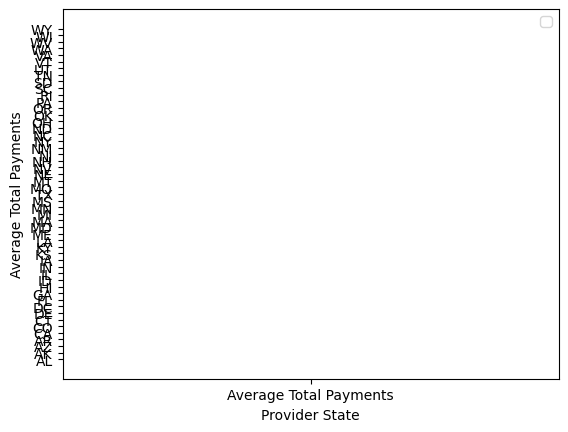

In [39]:
#Plot a Bar chart by state and "Average Total Payments"
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sf = pd.read_csv('/content/analytics_input.csv',sep=',',  encoding='latin-1')
sf.head(5)
#plt.bar('Provider State','Average Total Payments',data=sf)
#plt.show()
plt.barh('Provider State','Average Total Payments', data=sf, color='orange')
plt.xlabel("Provider State")
plt.ylabel("Average Total Payments")
plt.legend()
plt.show()

<ipython-input-33-d5a92e50144c>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  sf2 = pd.read_csv('/content/analytics_input.csv',sep=',',  encoding='latin-1')


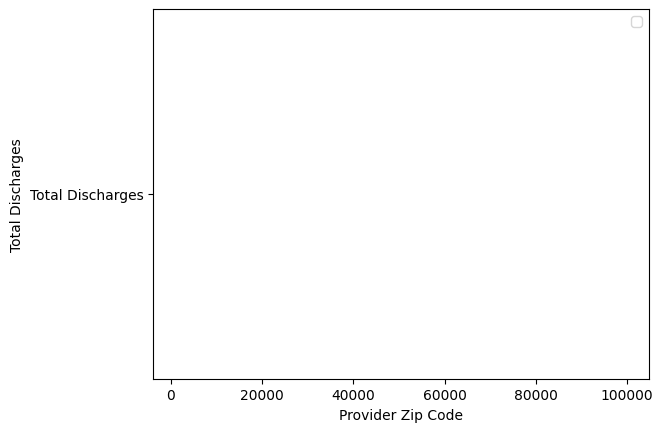

In [33]:
#Plot a Bar chart by state and "Average Total Payments" and zip code vs "total_charges"
sf2 = pd.read_csv('/content/analytics_input.csv',sep=',',  encoding='latin-1')
#sf.head(5)
#plt.bar('Provider State','Average Total Payments',data=sf)
#plt.show()
plt.bar('Provider Zip Code','Total Discharges', data=sf2, color='orange')
plt.xlabel("Provider Zip Code")
plt.ylabel("Total Discharges")
plt.legend()
plt.show()

In [26]:
#Write the Dataset to a Parquet format partitioned by State
df2.write.partitionBy('PROVIDER_STATE').parquet('reporting')
df4=spark.read.parquet('/content/reporting')
df4.show(5)

+--------------------+-----------+--------------------+-----------------------+-------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+--------------+
|      DRG_DEFINITION|PROVIDER_ID|       PROVIDER_NAME|PROVIDER_STREET_ADDRESS|PROVIDER_CITY|PROVIDER_ZIP_CODE|HOSPITAL_REFERRAL_REGION_DESCRIPTION|_TOTAL_DISCHARGES_|_AVERAGE_COVERED_CHARGES_|_AVERAGE_TOTAL_PAYMENTS_|AVERAGE_MEDICARE_PAYMENTS|PROVIDER_STATE|
+--------------------+-----------+--------------------+-----------------------+-------------+-----------------+------------------------------------+------------------+-------------------------+------------------------+-------------------------+--------------+
|039 - EXTRACRANIA...|      50006|  ST JOSEPH HOSPITAL|        2700 DOLBEER ST|       EUREKA|            95501|                        CA - Redding|                48|                $44664.45|                $8227.14|  

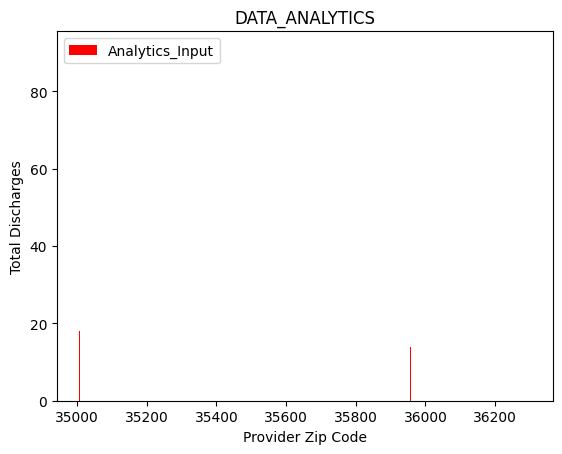

In [31]:
#Plot a Bar chart by zip code vs "total_charges" by another method with perticular columns.
graph2= {"Provider Zip Code": [36301, 35957, 35631, 35235, 35007, 36116],
"Total Discharges": [91,14,24,25,18,67]}
df = pd.DataFrame(graph2)
x = df['Provider Zip Code']
y = df['Total Discharges']
plt.xlabel('Provider Zip Code')
plt.ylabel('Total Discharges')
plt.bar(x,y, label='Analytics_Input', color='red')
plt.title('DATA_ANALYTICS')
plt.legend()
plt.show()

